### HYPOTHESIS:

1. There is a better quality life in South American cities than in Australian cities.
2. Air quality has a positive correlation with Outdoor score.
3.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
import plotly.express as px

#### Loading data:

In [14]:
lifequality=pd.read_csv("../data/df_enriched.csv")

In [15]:
lifequality.head()

,Unnamed: 0,Unnamed: 0.1,City,Country,Continent,Housing,Cost of Living,Commute,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Outdoors,Average Score,Air Quality,Air Quality Level
0,0,0,Aarhus,Denmark,Europe,6.1315,4.015,6.31175,9.6165,8.704333,5.3665,7.63300,4.8865,5.0680,8.373,3.1870,4.1300,6.118590,NaN,NaN
1,1,1,Adelaide,Australia,Oceania,6.3095,4.692,5.33625,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.341,4.3285,5.5310,5.877639,15,Good
2,2,2,Albuquerque,New Mexico,North America,7.2620,6.059,5.05575,1.3435,6.430000,4.1520,7.31950,6.5145,4.3460,5.396,4.8900,3.5155,5.190313,82,Moderate
3,3,3,Almaty,Kazakhstan,Asia,9.2820,9.333,5.87125,7.3090,4.545667,2.2830,3.85675,5.2690,8.5220,2.886,2.9370,5.5000,5.632889,185,Unhealthy
4,4,4,Amsterdam,Netherlands,Europe,3.0530,3.824,6.11850,8.5035,7.907333,6.1800,7.59725,5.0530,4.9550,4.523,8.8740,5.3070,5.991299,17,Good


### HYPOTHESIS 1: There is a better quality life in South American cities than in Australian cities.

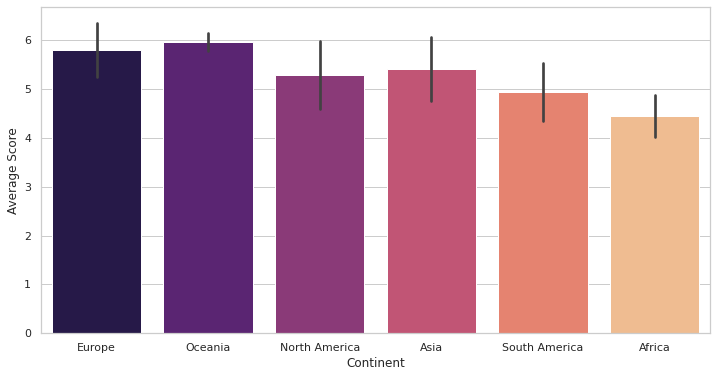

In [16]:
barplot = sns.barplot(x="Continent", y="Average Score", data=lifequality,ci="sd", palette="magma");

### HYPOTHESIS 2: Air quality has a positive correlation with Outdoor score.

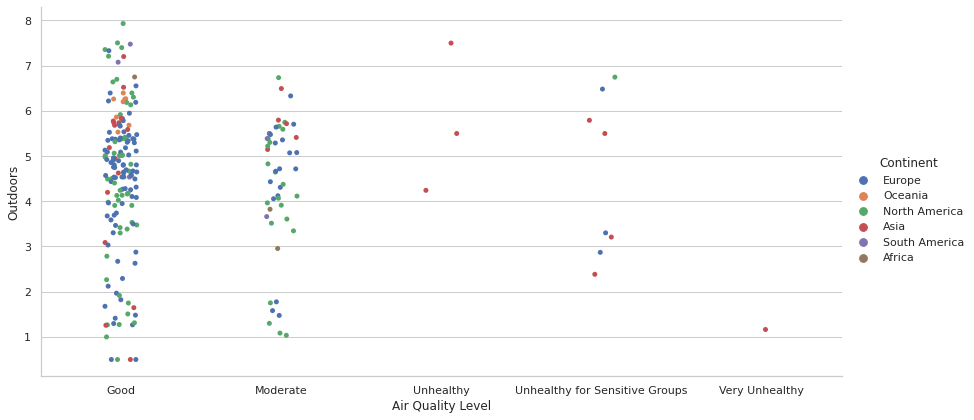

In [17]:
sns.catplot(x="Air Quality Level", y="Outdoors", data=lifequality,hue="Continent",height=6, aspect=2);

No hay correlación entre la calidad del aire y la puntuación de "Outdoor". 

### HYPOTHESIS 3:

In [69]:
lifequality.Country.value_counts()

 United Kingdom    13
 Canada            11
 Germany           11
 France             9
 Spain              7
                   ..
 Qatar              1
 Michigan           1
 Iowa               1
 Tanzania           1
 Croatia            1
Name: Country, Length: 135, dtype: int64

In [53]:
oceania=lifequality[lifequality['Continent']=="Oceania"]
europe=lifequality[lifequality['Continent']=="Europe"]
north_america=lifequality[lifequality['Continent']=="North America"]
asia=lifequality[lifequality['Continent']=="Asia"]
south_america=lifequality[lifequality['Continent']=="South America"]
africa=lifequality[lifequality['Continent']=="Africa"]

In [91]:
europe2=europe.groupby("Country").agg({"Average Score": "mean"})
oceania2=oceania.groupby("Country").agg({"Average Score": "mean"})
north_america2=north_america.groupby("Country").agg({"Average Score": "mean"})
asia2=asia.groupby("Country").agg({"Average Score": "mean"})
south_america2=south_america.groupby("Country").agg({"Average Score": "mean"})
africa2=africa.groupby("Country").agg({"Average Score": "mean"})

In [92]:
asia2.head()

,Average Score
Country,
Armenia,5.926313
Azerbaijan,5.170021
Cambodia,4.912354
China,5.352785
Hong Kong,6.100083


In [93]:
europe2['Country'] = europe2.index
oceania2['Country'] = oceania2.index
north_america2['Country'] = north_america2.index
asia2['Country'] = asia2.index
south_america2['Country'] = south_america2.index
africa2['Country'] = africa2.index

In [112]:
oceania2.head()

,Average Score,Country
Country,,
Australia,5.866843,Australia
New Zealand,6.111155,New Zealand


In [116]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=3, column_widths=[0.7, 0.7, 0.7],
    subplot_titles=("Oceanía","Europe", "North America","Asia","South America","África"))


fig.add_trace(
    go.Bar(x=oceania.Country, y=oceania["Average Score"]),
    row=1, col=1

)
fig.add_trace(
go.Bar(x=europe2.Country, y=europe2["Average Score"]),
    row=1, col=2
)

fig.add_trace(
go.Bar(x=north_america2.Country, y=north_america2["Average Score"]),
    row=1, col=3
)

fig.add_trace(
go.Bar(x=asia2.Country, y=asia2["Average Score"]),
    row=2, col=1
)

fig.add_trace(
go.Bar(x=south_america2.Country, y=south_america2["Average Score"]),
    row=2, col=2
)

fig.add_trace(
go.Bar(x=africa2.Country, y=africa2["Average Score"]),
    row=2, col=3
    
    
)

fig.update_layout(height=800, width=900, title_text="Average Score by Continents and its Countries")

fig.show()

### otra prueba

In [132]:
#EUROPE:
# Generamos la figura y establecemos los valores para configurar
# el encuadre, la paleta de colores, la capa de datos, la etiqueta
fig = go.Figure(go.Choropleth(
    locations = europe2['Country'],
    locationmode = "country names",
    z = europe2['Average Score'],
    text = europe2['Country'],
    colorscale = 'viridis',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#efefef',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Average Score',
    )
)
 
# Establecemos las características del título y la apariencia del mapa base
fig.update_layout(
    title_text = 'Air Quality by Country in Europe',
    showlegend = False,
    geo = dict(
        scope='europe',
        resolution=50,
        projection_type='miller',
        showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#eaeaea',
        lakecolor='#eaeaea',
        coastlinecolor='#dadada'
    )
)
 

# Mostramos la figura generada
fig.show()

In [137]:
#AFRICA:
# Generamos la figura y establecemos los valores para configurar
# el encuadre, la paleta de colores, la capa de datos, la etiqueta
fig = go.Figure(go.Choropleth(
    locations = africa2['Country'],
    locationmode = "country names",
    z = africa2['Average Score'],
    text = africa2['Country'],
    colorscale = 'magma',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='#efefef',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = 'Average Score',
    )
)
 
# Establecemos las características del título y la apariencia del mapa base
fig.update_layout(
    title_text = 'Air Quality by Country in Africa',
    showlegend = False,
    geo = dict(
        scope='africa',
        resolution=50,
        projection_type='miller',
        showcoastlines=True,
        showocean=True,
        showcountries=True,
        oceancolor='#eaeaea',
        lakecolor='#eaeaea',
        coastlinecolor='#dadada'
    )
)
 

# Mostramos la figura generada
fig.show()

In [126]:
europe2.head()

,Average Score,Country
Country,,
Austria,5.929976,Austria
Belarus,6.007993,Belarus
Belgium,5.738090,Belgium
Bosnia and Herzegovina,5.503556,Bosnia and Herzegovina
Bulgaria,5.937243,Bulgaria
